In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import rdata
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
import preprocessing as pp 
import fonctions_utiles as fu


In [8]:
path = r"C:\Users\Marc2\OneDrive\Documents\M2 MLB\chinese_microbiome\more_data\healthy_vs_uc_stool\otutable.csv"
df = pd.read_csv(path,delim_whitespace=True)
df.head()

C:\Users\Marc2\AppData\Local\Temp\ipykernel_14440\1796024797.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path,delim_whitespace=True)


,#OTU_ID,100109.518535,100222.518527,7130.518412,100090.518522,100015.518484,7134.518478,7908.518449,100143.518580,100169.518565,...,7454.518419,100175.518515,100070.518622,7360.518446,7016.518555,7094A.518503,7352.518512,100157.518518,100139.518500,7646.518523
0,584463,384,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,308333,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,195157,0,43,0,48,526,0,0,0,0,...,0,0,184,0,0,0,0,0,0,0
3,188856,0,0,0,0,1,12,0,119,0,...,0,0,4,0,0,0,0,0,0,0
4,1083194,0,0,1,1,1,24,0,8,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
data_path = "data.Rdata" ; otu_path = "otu.Rdata" ; tax_path = "taxonomy.Rdata"
converted_data = rdata.read_rds(data_path) ; converted_otu = rdata.read_rds(otu_path) ; converted_tax = rdata.read_rds(tax_path) 
data_df = pd.DataFrame(converted_data['meta.full']) ; otu_df = pd.DataFrame(converted_otu['otu.full'])  ; tax_df = pd.DataFrame(converted_tax['taxonomy'])
print(f"Data_df ---> {data_df.shape}")
print(f"Otu_df ---> {otu_df.shape}")
print(f"Tax_df ---> {tax_df.T.shape}")


C:\Users\Marc2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\rdata\parser\_parser.py:1239: UserWarning: Wrong extension .rds for file in RDATA format
  warnings.warn(  # noqa: B028
C:\Users\Marc2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\rdata\parser\_parser.py:1239: UserWarning: Wrong extension .rds for file in RDATA format
  warnings.warn(  # noqa: B028
C:\Users\Marc2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\rdata\parser\_parser.py:1239: UserWarning: Wrong extension .rds for file in RDATA format
  warnings.warn(  # noqa: B028


Data_df ---> (284, 61)
Otu_df ---> (284, 2565)
Tax_df ---> (7, 9965)


In [18]:
otu_df.columns

Index(['1134168', '4454356', '261920', '4455330', '2506486', '4343580',
       '166156', '4465907', '4454531', '295854',
       ...
       '300646', '4330715', '4311620', '4311621', '365385', '192963', '296945',
       '4431803', '4475642', '4480061'],
      dtype='object', length=2565)

In [74]:
merged_df = pp.mergin(data_df,otu_df,tax_df,"taxonomy7")
merged_df.shape

(262, 81)

In [ ]:
merged_df

In [56]:
merged_df.to_csv("final_df_with_taxonomy_grouped.csv",index=False)

In [67]:
X = merged_df.drop(columns=['diagnosis'])
y = merged_df.loc[:, "diagnosis"].astype(str)

Actuellement, sur le modèle rf...

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Report RF (uncalibrated):
               precision    recall  f1-score   support

     disease       0.73      0.88      0.80        50
     healthy       0.68      0.45      0.54        29

    accuracy                           0.72        79
   macro avg       0.71      0.66      0.67        79
weighted avg       0.72      0.72      0.71        79



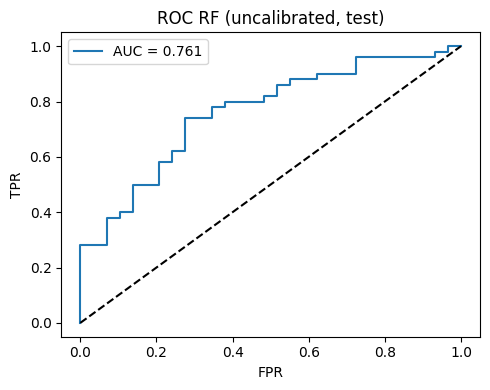

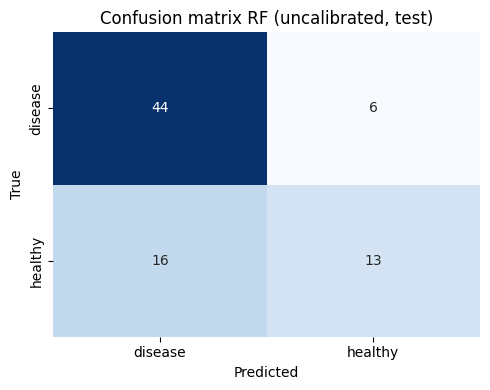

C:\Users\Marc2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\calibration.py:330: FutureWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
C:\Users\Marc2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\calibration.py:330: FutureWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
C:\Users\Marc2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\calibration.py:330: FutureWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(est

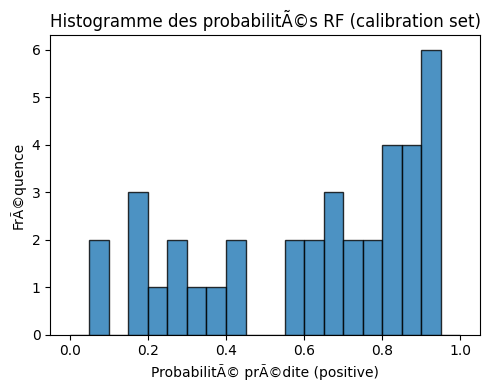

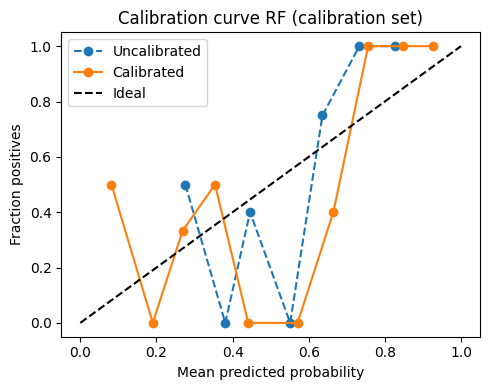

Rapport RF (calibrated):
               precision    recall  f1-score   support

     disease       0.75      0.80      0.78        50
     healthy       0.62      0.55      0.58        29

    accuracy                           0.71        79
   macro avg       0.69      0.68      0.68        79
weighted avg       0.70      0.71      0.71        79



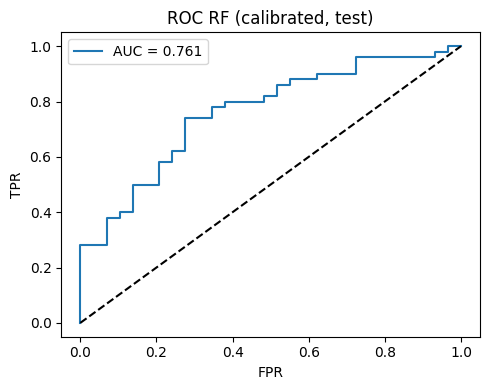

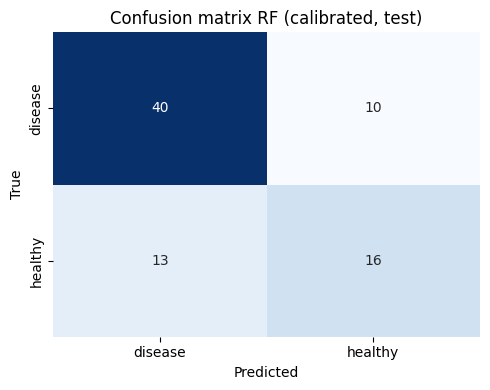

Meilleur seuil (Youden J) RF sur calib: 0.6974 | J=0.8261 | TPR=0.8261 | FPR=0.0000
Rapport RF (calibrated + threshold):
               precision    recall  f1-score   support

     disease       0.81      0.60      0.69        50
     healthy       0.52      0.76      0.62        29

    accuracy                           0.66        79
   macro avg       0.67      0.68      0.65        79
weighted avg       0.71      0.66      0.66        79



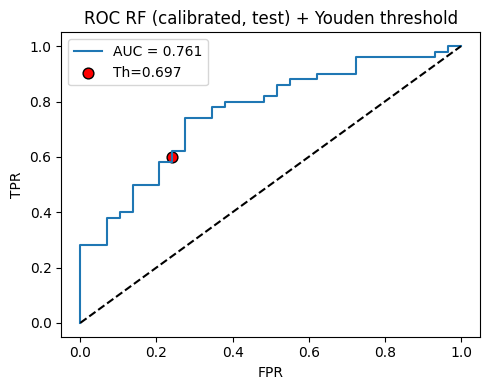

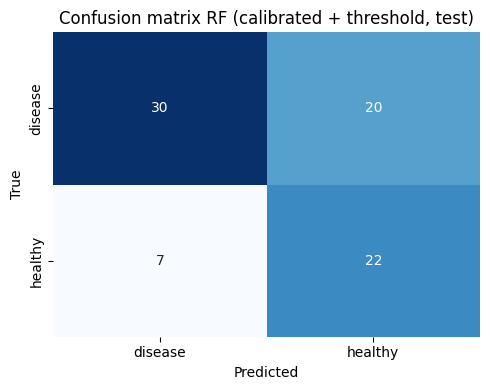

In [76]:
# Initialisation de la liste de nom de modèles 
model_names = ["rf"]
# Iniatilisation de la liste de matrice de confusion
model_cm = [] 

# Création d'un nouveau dataframe pour récupérer les résultats de chaque modèle
report_df = pd.DataFrame(columns=["modèle", "accuracy","precision","recall","f1-score","auc","threshold","fold_scores"])


# Boucle sur tous les modèles de la liste
for model_name in model_names : 
    
    print(f"Actuellement, sur le modèle {model_name}...\n")
    
    if model_name == "nn" :
        
        input_dim = merged_df.shape[1]-1 
        num_classes = len(merged_df["diagnosis"].value_counts())
        nn_model = fu.build_model(input_dim,num_classes,0.003)
        model = fu.train_model(nn_model,merged_df,"diagnosis")
    else :
        model = fu.train_with_calibration(model_name,X,y)
        
    model_cm.append(model["cm_final"])
        
    report_df.loc[len(report_df)] = [model_name,
                                        model["accuracy"],
                                        model["precision"],
                                        model["recall"], 
                                        model["f1-score"], 
                                        model["auc_calibrated"],
                                        model["best_threshold"],
                                        model["fold_scores"]]
    


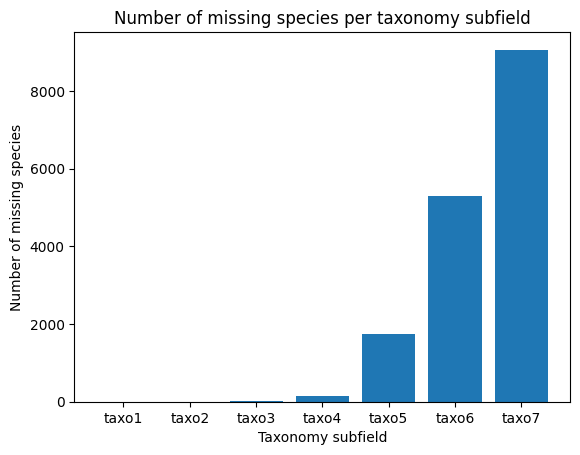

In [5]:
# tax_prefixes = ['k__','p__','c__','o__','f__','g__','s__']

missing_counts = []
for column in tax_df.columns : 
    count = tax_df[column].str.endswith('__').sum()
    missing_counts.append(count)

plt.bar([el[:4] + el[-1] for el in tax_df.columns],missing_counts)
plt.title("Number of missing species per taxonomy subfield")
plt.xlabel("Taxonomy subfield")
plt.ylabel("Number of missing species")
plt.show()
# tax_df["taxonomy1"].value_counts()


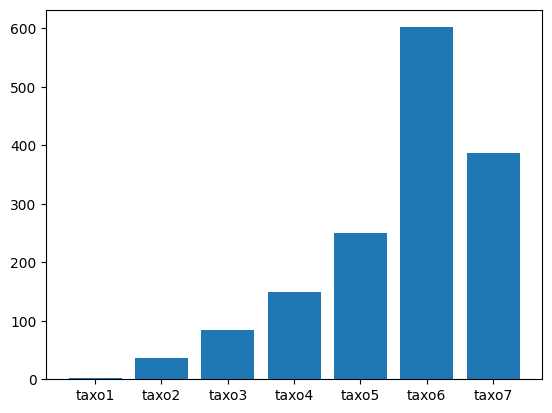

In [6]:
unique_values = []
for column in tax_df.columns :  
    unique_values.append(len(tax_df[column].unique()))
plt.bar([el[:4] + el[-1] for el in tax_df.columns],unique_values)
plt.show()


In [19]:
count = 0
for column in otu_df.columns : 
    for el in tax_df["taxonomy4"].index : 
        if column == el : 
            # print(f"It's true for {column} and {el}")
            count +=1 
            break          

In [10]:
# First, transpose otu_df so that OTUs become the index.
otu_df_transposed = otu_df.T

# Now, both otu_df_transposed and tax_df have OTU IDs as their index.
# You can join them. An 'inner' join keeps only the OTUs found in both DataFrames.
tax_df = tax_df.drop(columns=["taxonomy"+str(i) for i in [1,2,3,5,6,7]])
merged_df = tax_df.join(otu_df_transposed, how='inner')

# Display the first few rows of the merged DataFrame
print("Shape of the merged DataFrame:", merged_df.shape)
merged_df.head()

Shape of the merged DataFrame: (2565, 285)


,taxonomy4,1939.SKBTI.1068,1939.SKBTI.0448,1939.SKBTI.0766,1939.SKBTI.0877,1939.SKBTI.0890,1939.SKBTI.0937,1939.SKBTI.0944,1939.SKBTI.0954,1939.SKBTI.1056,...,1939.SKBTI.1340,1939.SKBTI.1353,1939.SKBTI.0759,1939.SKBTI.1033,1939.SKBTI.1049,1939.SKBTI.1268,1939.SKBTI.0749,1939.SKBTI.0987,1939.SKBTI.1103,1939.SKBTI.1280
1134168,o__Pasteurellales,0.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4454356,o__Neisseriales,0.0,0.0,0.0,23.0,67.0,2.0,4.0,19.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
261920,o__Vibrionales,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4455330,o__Burkholderiales,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2506486,o__Clostridiales,7.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
data_df

,sample_name,age,age_unit,altitude,anonymized_name,antibiotics,b_cat,biologics,biopsy_location,birthdate,...,race,sample_type,scientific_name,sex,smoking,steroids,taxon_id,title,type_sample,disease
1027,1939.SKBTI.1068,16.250000,years,0,SKBTI.1068,false,B1,false,Rectum,Missing: Restricted access,...,other,biopsy,human gut metagenome,female,Missing: Not provided,false,408170,The Treatment-Naive Microbiome in New-Onset Cr...,biopsy,0.0
625,1939.SKBTI.0448,11.500000,years,0,SKBTI.0448,false,B1,false,Rectum,Missing: Restricted access,...,caucasian,biopsy,human gut metagenome,male,Missing: Not provided,false,408170,The Treatment-Naive Microbiome in New-Onset Cr...,biopsy,1.0
862,1939.SKBTI.0766,8.500000,years,0,SKBTI.0766,false,B1,false,Rectum,Missing: Restricted access,...,caucasian,biopsy,human gut metagenome,female,Missing: Not provided,false,408170,The Treatment-Naive Microbiome in New-Onset Cr...,biopsy,1.0
876,1939.SKBTI.0877,16.833333,years,0,SKBTI.0877,false,B1,false,Rectum,Missing: Restricted access,...,caucasian,biopsy,human gut metagenome,male,Missing: Not provided,false,408170,The Treatment-Naive Microbiome in New-Onset Cr...,biopsy,1.0
886,1939.SKBTI.0890,13.750000,years,0,SKBTI.0890,false,B1,false,Rectum,Missing: Restricted access,...,caucasian,biopsy,human gut metagenome,male,Missing: Not provided,false,408170,The Treatment-Naive Microbiome in New-Onset Cr...,biopsy,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,1939.SKBTI.1268,15.500000,years,0,SKBTI.1268,false,B1,false,Rectum,Missing: Restricted access,...,caucasian,biopsy,human gut metagenome,male,Missing: Not provided,false,408170,The Treatment-Naive Microbiome in New-Onset Cr...,biopsy,1.0
846,1939.SKBTI.0749,15.750000,years,0,SKBTI.0749,false,B1,false,Rectum,Missing: Restricted access,...,caucasian,biopsy,human gut metagenome,female,Missing: Not provided,false,408170,The Treatment-Naive Microbiome in New-Onset Cr...,biopsy,1.0
953,1939.SKBTI.0987,13.583333,years,0,SKBTI.0987,false,B1,false,Rectum,Missing: Restricted access,...,caucasian,biopsy,human gut metagenome,male,Missing: Not provided,false,408170,The Treatment-Naive Microbiome in New-Onset Cr...,biopsy,1.0
1054,1939.SKBTI.1103,8.833333,years,0,SKBTI.1103,false,B1,false,Rectum,Missing: Restricted access,...,caucasian,biopsy,human gut metagenome,female,Missing: Not provided,false,408170,The Treatment-Naive Microbiome in New-Onset Cr...,biopsy,1.0


In [38]:
merged_df["taxonomy4"] = merged_df["taxonomy4"].apply(lambda x : "Non_indentified" if x.endswith("__") else x[3:])

In [43]:
merged_df

,taxonomy4,1939.SKBTI.1068,1939.SKBTI.0448,1939.SKBTI.0766,1939.SKBTI.0877,1939.SKBTI.0890,1939.SKBTI.0937,1939.SKBTI.0944,1939.SKBTI.0954,1939.SKBTI.1056,...,1939.SKBTI.1340,1939.SKBTI.1353,1939.SKBTI.0759,1939.SKBTI.1033,1939.SKBTI.1049,1939.SKBTI.1268,1939.SKBTI.0749,1939.SKBTI.0987,1939.SKBTI.1103,1939.SKBTI.1280
1134168,Pasteurellales,0.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4454356,Neisseriales,0.0,0.0,0.0,23.0,67.0,2.0,4.0,19.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
261920,Vibrionales,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4455330,Burkholderiales,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2506486,Clostridiales,7.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192963,Verrucomicrobiales,0.0,7.0,0.0,0.0,0.0,86.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296945,Burkholderiales,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4431803,Streptophyta,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,2.0,...,183.0,3.0,0.0,0.0,0.0,6.0,0.0,0.0,281.0,0.0
4475642,Bacteroidales,4.0,18.0,4.0,0.0,0.0,5.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0


In [26]:
from sklearn.feature_selection import SelectKBest, f_classif

# Separate features (X) and target (y)
X = merged_df.drop(columns=['diagnosis', 'age'])
y = merged_df['diagnosis']

# --- Feature Selection ---
# Define the selector to keep the top 50 features. You can change k.
k_best_selector = SelectKBest(score_func=f_classif, k=50)

# Fit the selector to your data
X_new = k_best_selector.fit_transform(X, y)

# Get the names of the selected columns
selected_mask = k_best_selector.get_support()
selected_columns = X.columns[selected_mask]

# Create the new, reduced DataFrame
# We add back the 'age' and 'diagnosis' columns
reduced_df = pd.DataFrame(X_new, columns=selected_columns, index=merged_df.index)
reduced_df['age'] = merged_df['age']
reduced_df['diagnosis'] = y

print("Original number of features:", X.shape[1])
print("Reduced number of features:", reduced_df.shape[1] - 2) # Subtract age and diagnosis
print(reduced_df.head())


KeyError: "['diagnosis', 'age'] not found in axis"